In [6]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
sc.logging.print_header()

from matplotlib import rcParams

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('default')  

#-- 
#https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

import warnings
warnings.filterwarnings('ignore')

#-- -colors for DCs
col_ids =['tomato','paleturquoise','cornflowerblue','mediumseagreen','mediumpurple',
          'goldenrod','lightgreen','palevioletred','lightsalmon','thistle', #0-9
          "brown","plum","lightskyblue","yellowgreen","mediumorchid","mediumturquoise","peru",
          "#bf812d","mediumaquamarine","lightslategrey","dodgerblue","#4daf4a",'#377eb8','#dd1c77']

col_pGroups = ["#d8daeb", "#9e9ac8", "#54278f","#66bd63"]
col_groups = ["#9e9ac8","#66bd63"]

import warnings
warnings.filterwarnings('ignore')

scanpy==1.9.6 anndata==0.9.2 umap==0.5.6 numpy==1.24.3 scipy==1.10.1 pandas==2.0.3 scikit-learn==1.3.2 statsmodels==0.14.1 igraph==0.10.8 pynndescent==0.5.13


In [7]:
sc.settings.set_figure_params(dpi=80)

# Load pbmc data 

In [5]:
pbmc=sc.read('../H5AD/pCov40_bbknn_04152024.h5ad')
pbmc

AnnData object with n_obs × n_vars = 203402 × 1362
    obs: 'Cells', 'Samples', 'IDs', 'Names', 'Fig_ids', 'Groups', 'Ethnicity', 'Age_Months', 'runs_10X', 'Year', 'Patient_groups', 'doublet_score', 'predicted_doublets_1', 'n_genes', 'percent_mito', 'n_counts', 'Res1_2_BC', 'Res1_2_AC', 'Fig_ids_Groups', 'annotated_clusters', 'ISG_score_raw', 'ISG_score', 'INFLAM_score_raw', 'INFLAM_score', 'SCs', 'annotated_SCs', 'simple_clustering', 'umap_density_Groups', '_tmp_embedding_density_column_6807_', '_tmp_embedding_density_column_9508_'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Fig_ids_colors', 'Groups_colors', 'Patient_groups_colors', 'Res1_2_AC_colors', 'SCs_colors', 'annotated_SCs_colors', 'annotated_clusters_colors', 'dendrogram_Patient_groups', 'dendrogram_SCs', 'dendrogram_annotated_clusters', 'dendrogram_simple_clustering', 'neighbors', 'runs_10X_colors', 'simple_clustering_colors', 'umap_d

In [ ]:
pbmc.uns['Groups_colors']=col_groups
pbmc.uns['Patient_groups_colors']=col_pGroups
pbmc.uns['annotated_clusters_colors']=col_ids

# Figure. 1C

In [ ]:
cols = {
         'CD8_Tcells' : '#fc8d59',
         'CD4_Tcells' : '#9e9ac8',
         'B_cells':'#96daf7',
         'NK' : '#fed976',
         'HSCs' : '#b0479a',
         'Eryth' : '#35978f',
         'pDC' : '#193a1c',
         #'Plasma' : '#232323',
         'Mgk' : '#8c510a',
         'cDC' : '#e31a1c',
         'CD14_mono' : '#f6a2a7',
         'CD16_mono' : '#f9d3d7',
         'PCs' : '#08306b'}

In [ ]:
rcParams['figure.figsize'] = (5,5)

sc.pl.umap(pbmc, 
           color=['simple_clustering'], 
           color_map='OrRd',
           size=1, #***
           frameon=False,
           #legend_loc='on data',  
           #figsize=(10,10),
           legend_fontsize=10,  palette=cols,      
           title= 'Cell types')
           #save= '_pCov40_simple_clustering_04152024.pdf')

# Figure.1D

categories: CD4_Tcells, CD8_Tcells, B_cells, etc.
var_group_labels: Mgk, Mono, DCs, etc.


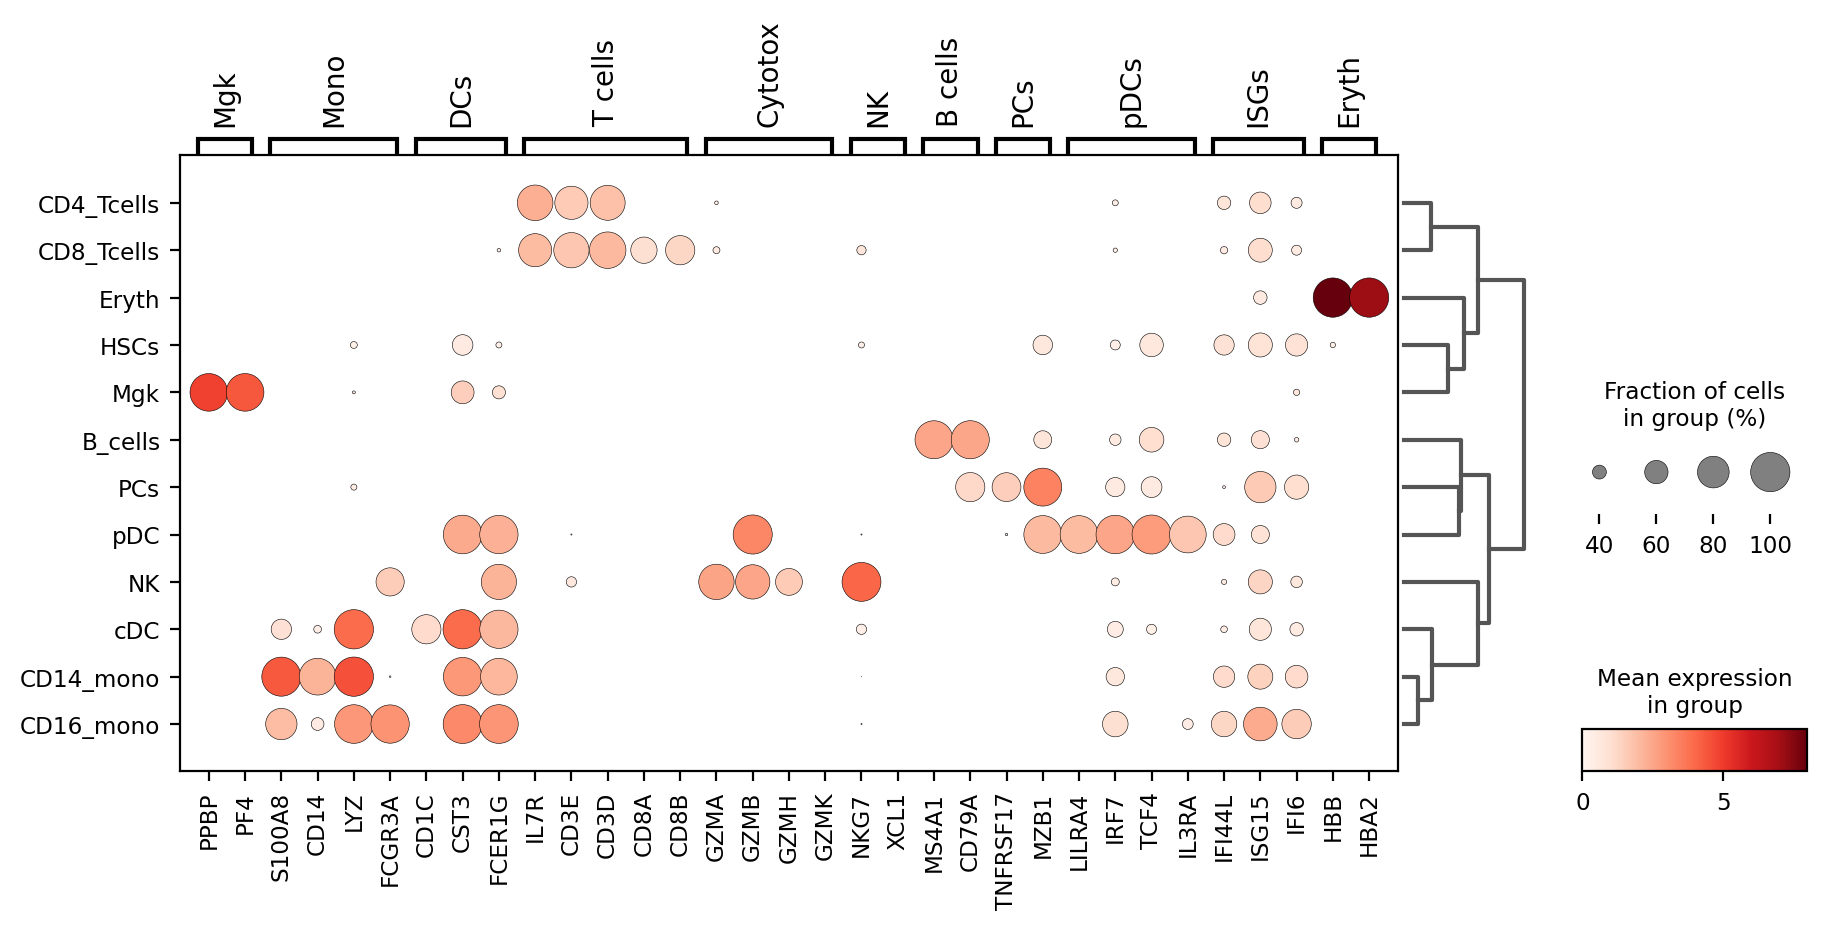

In [7]:
Genes =["PPBP","PF4", #mgk: 0-1
        "S100A8","CD14","LYZ","FCGR3A",#2-5
        'CD1C',"CST3","FCER1G", #6-8
        "IL7R","CD3E","CD3D","CD8A","CD8B", #9-13
        "GZMA","GZMB","GZMH","GZMK",
        "NKG7",'XCL1', #18-19
        "MS4A1", "CD79A", #20-21
        "TNFRSF17", "MZB1",#22-23
        'LILRA4',"IRF7","TCF4","IL3RA", #24-27
        'IFI44L','ISG15','IFI6',#28-30
        'HBB','HBA2'] #31-32

matplotlib.style.use('default') 
ax = sc.pl.dotplot(pbmc, 
                   Genes, 
                   'simple_clustering', 
                   dendrogram=True,  
                   var_group_positions=[(0,1),(2,5), (6,8),(9,13),(14,17),(18,19),(20,21),(22,23),(24,27),(28,30),(31,32)],
                   var_group_labels=['Mgk','Mono', 'DCs','T cells','Cytotox','NK','B cells','PCs','pDCs','ISGs','Eryth'], 
                   figsize=(10.5, 4),
                  dot_max=1,
                   dot_min=0.2)
                   #swap_axes=True ) 
                   #title= 'SCs (n=43)', 
                   #save='dotplot_pCov40_simple_clustering_04162024.pdf') 

# Figure.1E

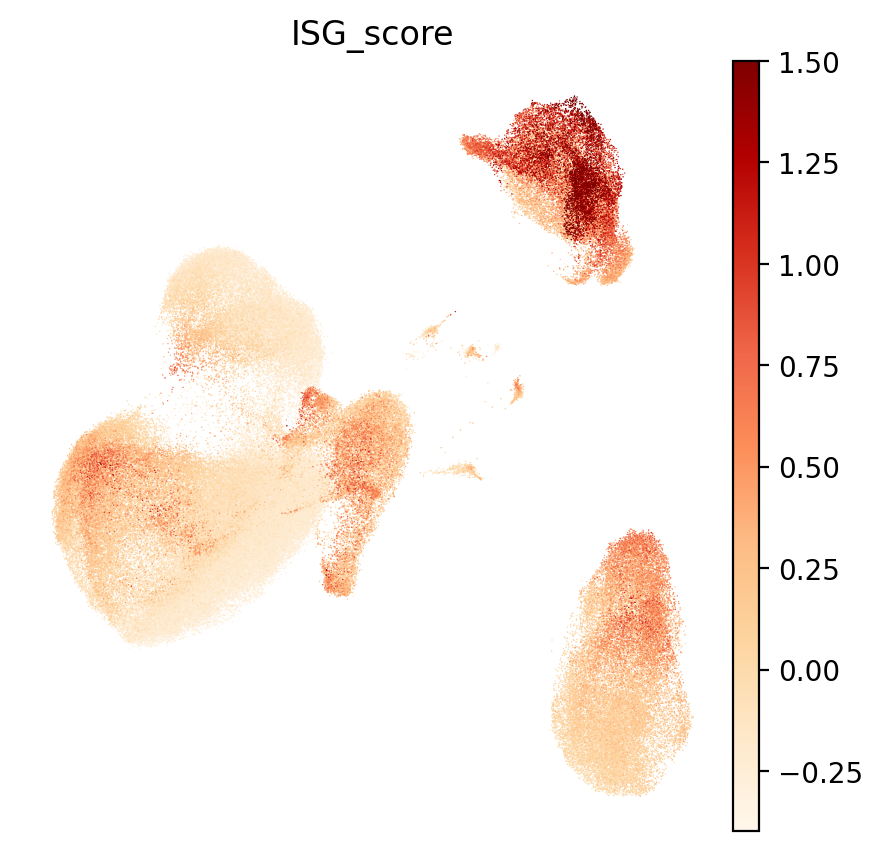

In [8]:
rcParams['figure.figsize'] = (5,5)

sc.pl.umap(pbmc, 
           color=['ISG_score'], 
           color_map='OrRd',
           size=1, #***
           frameon=False,
           #legend_loc='on data',  
           #figsize=(10,10),
           legend_fontsize=10, vmax=1.5) 
           #save= '_pCov40_ISG_score_04152024.pdf')

# Figure.1F

In [9]:
sc.tl.embedding_density(pbmc, basis='umap', groupby='Patient_groups')

computing density on 'umap'
--> added
    'umap_density_Patient_groups', densities (adata.obs)
    'umap_density_Patient_groups_params', parameter (adata.uns)


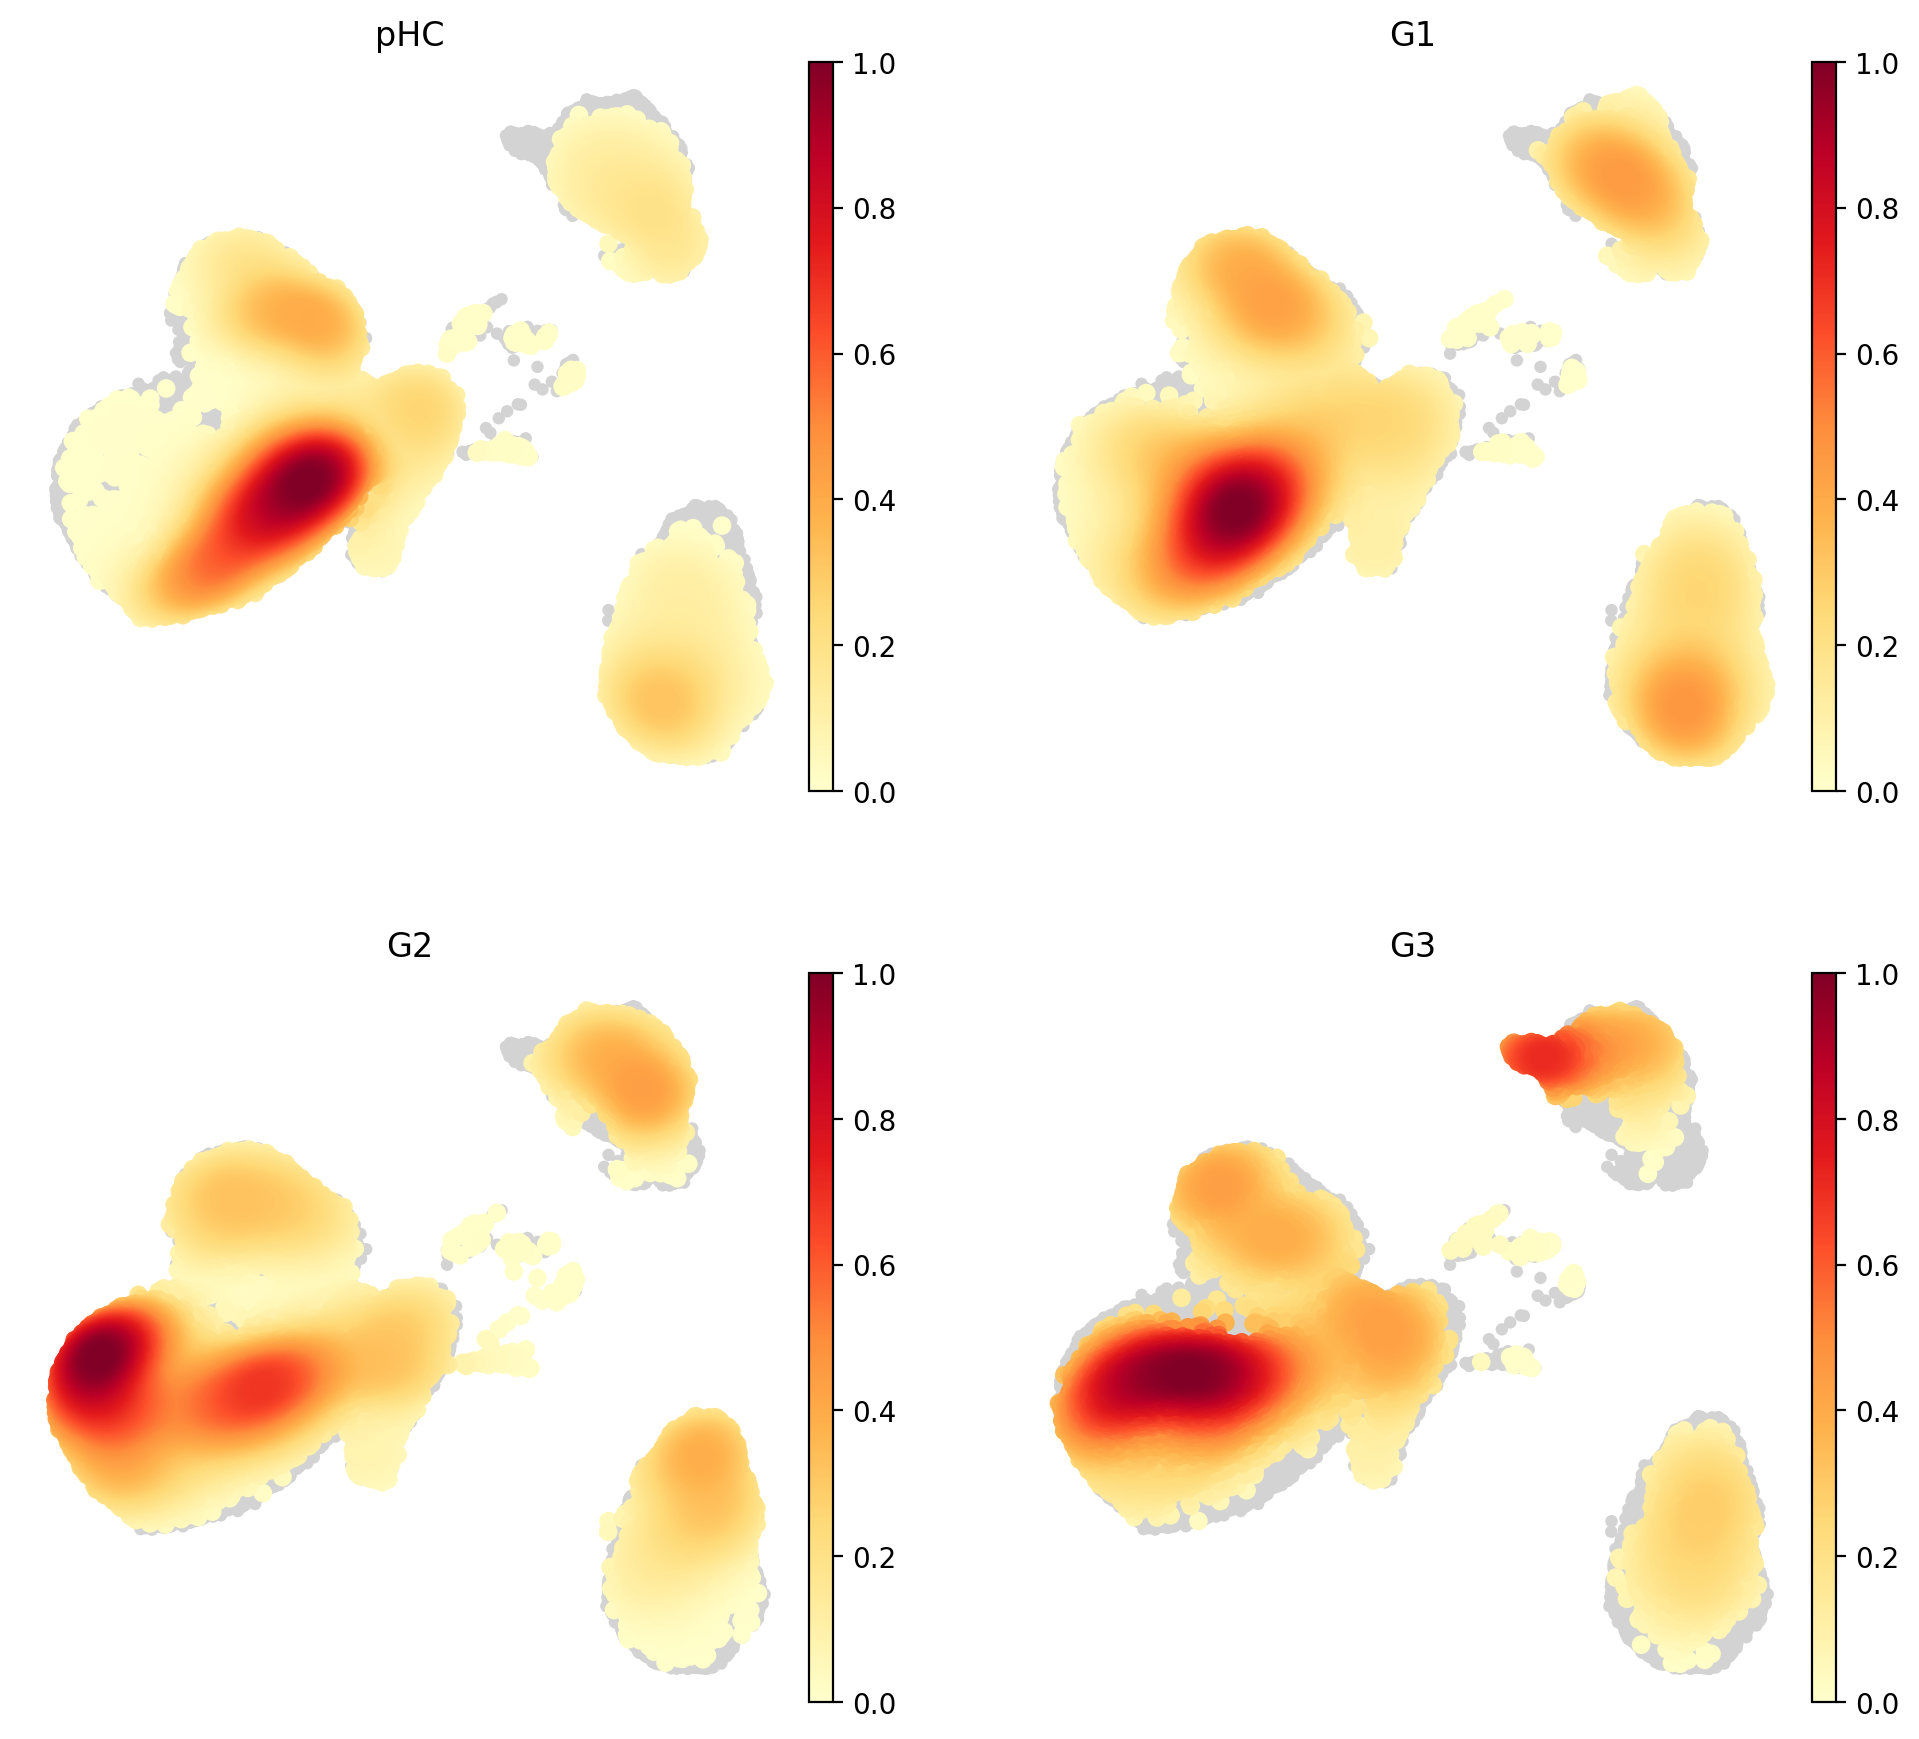

In [10]:
sc.pl.embedding_density(pbmc, 
                        basis='umap', 
                        key='umap_density_Patient_groups', 
                        group = ["pHC", "G1","G2","G3"], 
                        frameon = False, 
                        ncols=2) 
                        #save= 'pCov40_04152024.pdf')

# Supplementary figures 

# Figure S1G

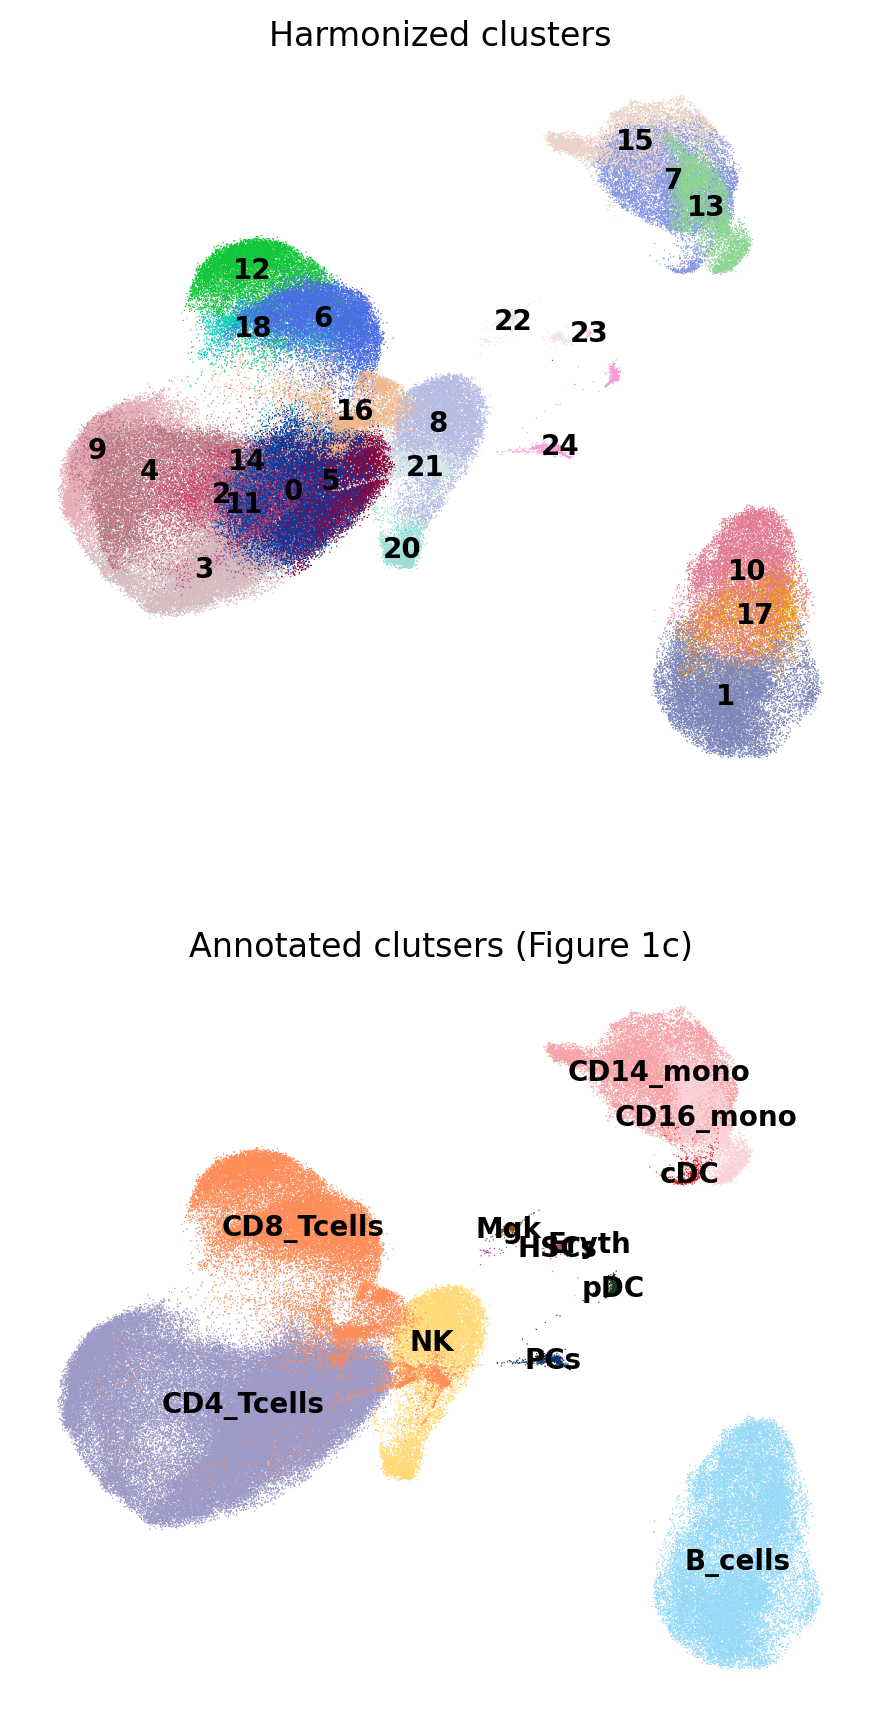

In [11]:
rcParams['figure.figsize'] = (5,5)

sc.pl.umap(pbmc, 
           color=['Res1_2_AC','simple_clustering'], 
           color_map='OrRd',
           size=1, #***
           frameon=False,
           legend_loc='on data',  ncols=1,
           #figsize=(10,10), 
           legend_fontsize=10, title =['Harmonized clusters','Annotated clutsers (Figure 1c)'])
           #save= '_pCov40_simple_clustering_supplem_06062024.pdf')

# Figure S1H

In [12]:
pbmc.obs['clusters_supp'] = pbmc.obs['simple_clustering'].str.cat(pbmc.obs['Res1_2_AC'],sep="_C")
pbmc.obs['clusters_supp']=pbmc.obs['clusters_supp'].astype('str').astype('category')

In [13]:
sc.tl.dendrogram(pbmc, groupby='clusters_supp')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_clusters_supp']`


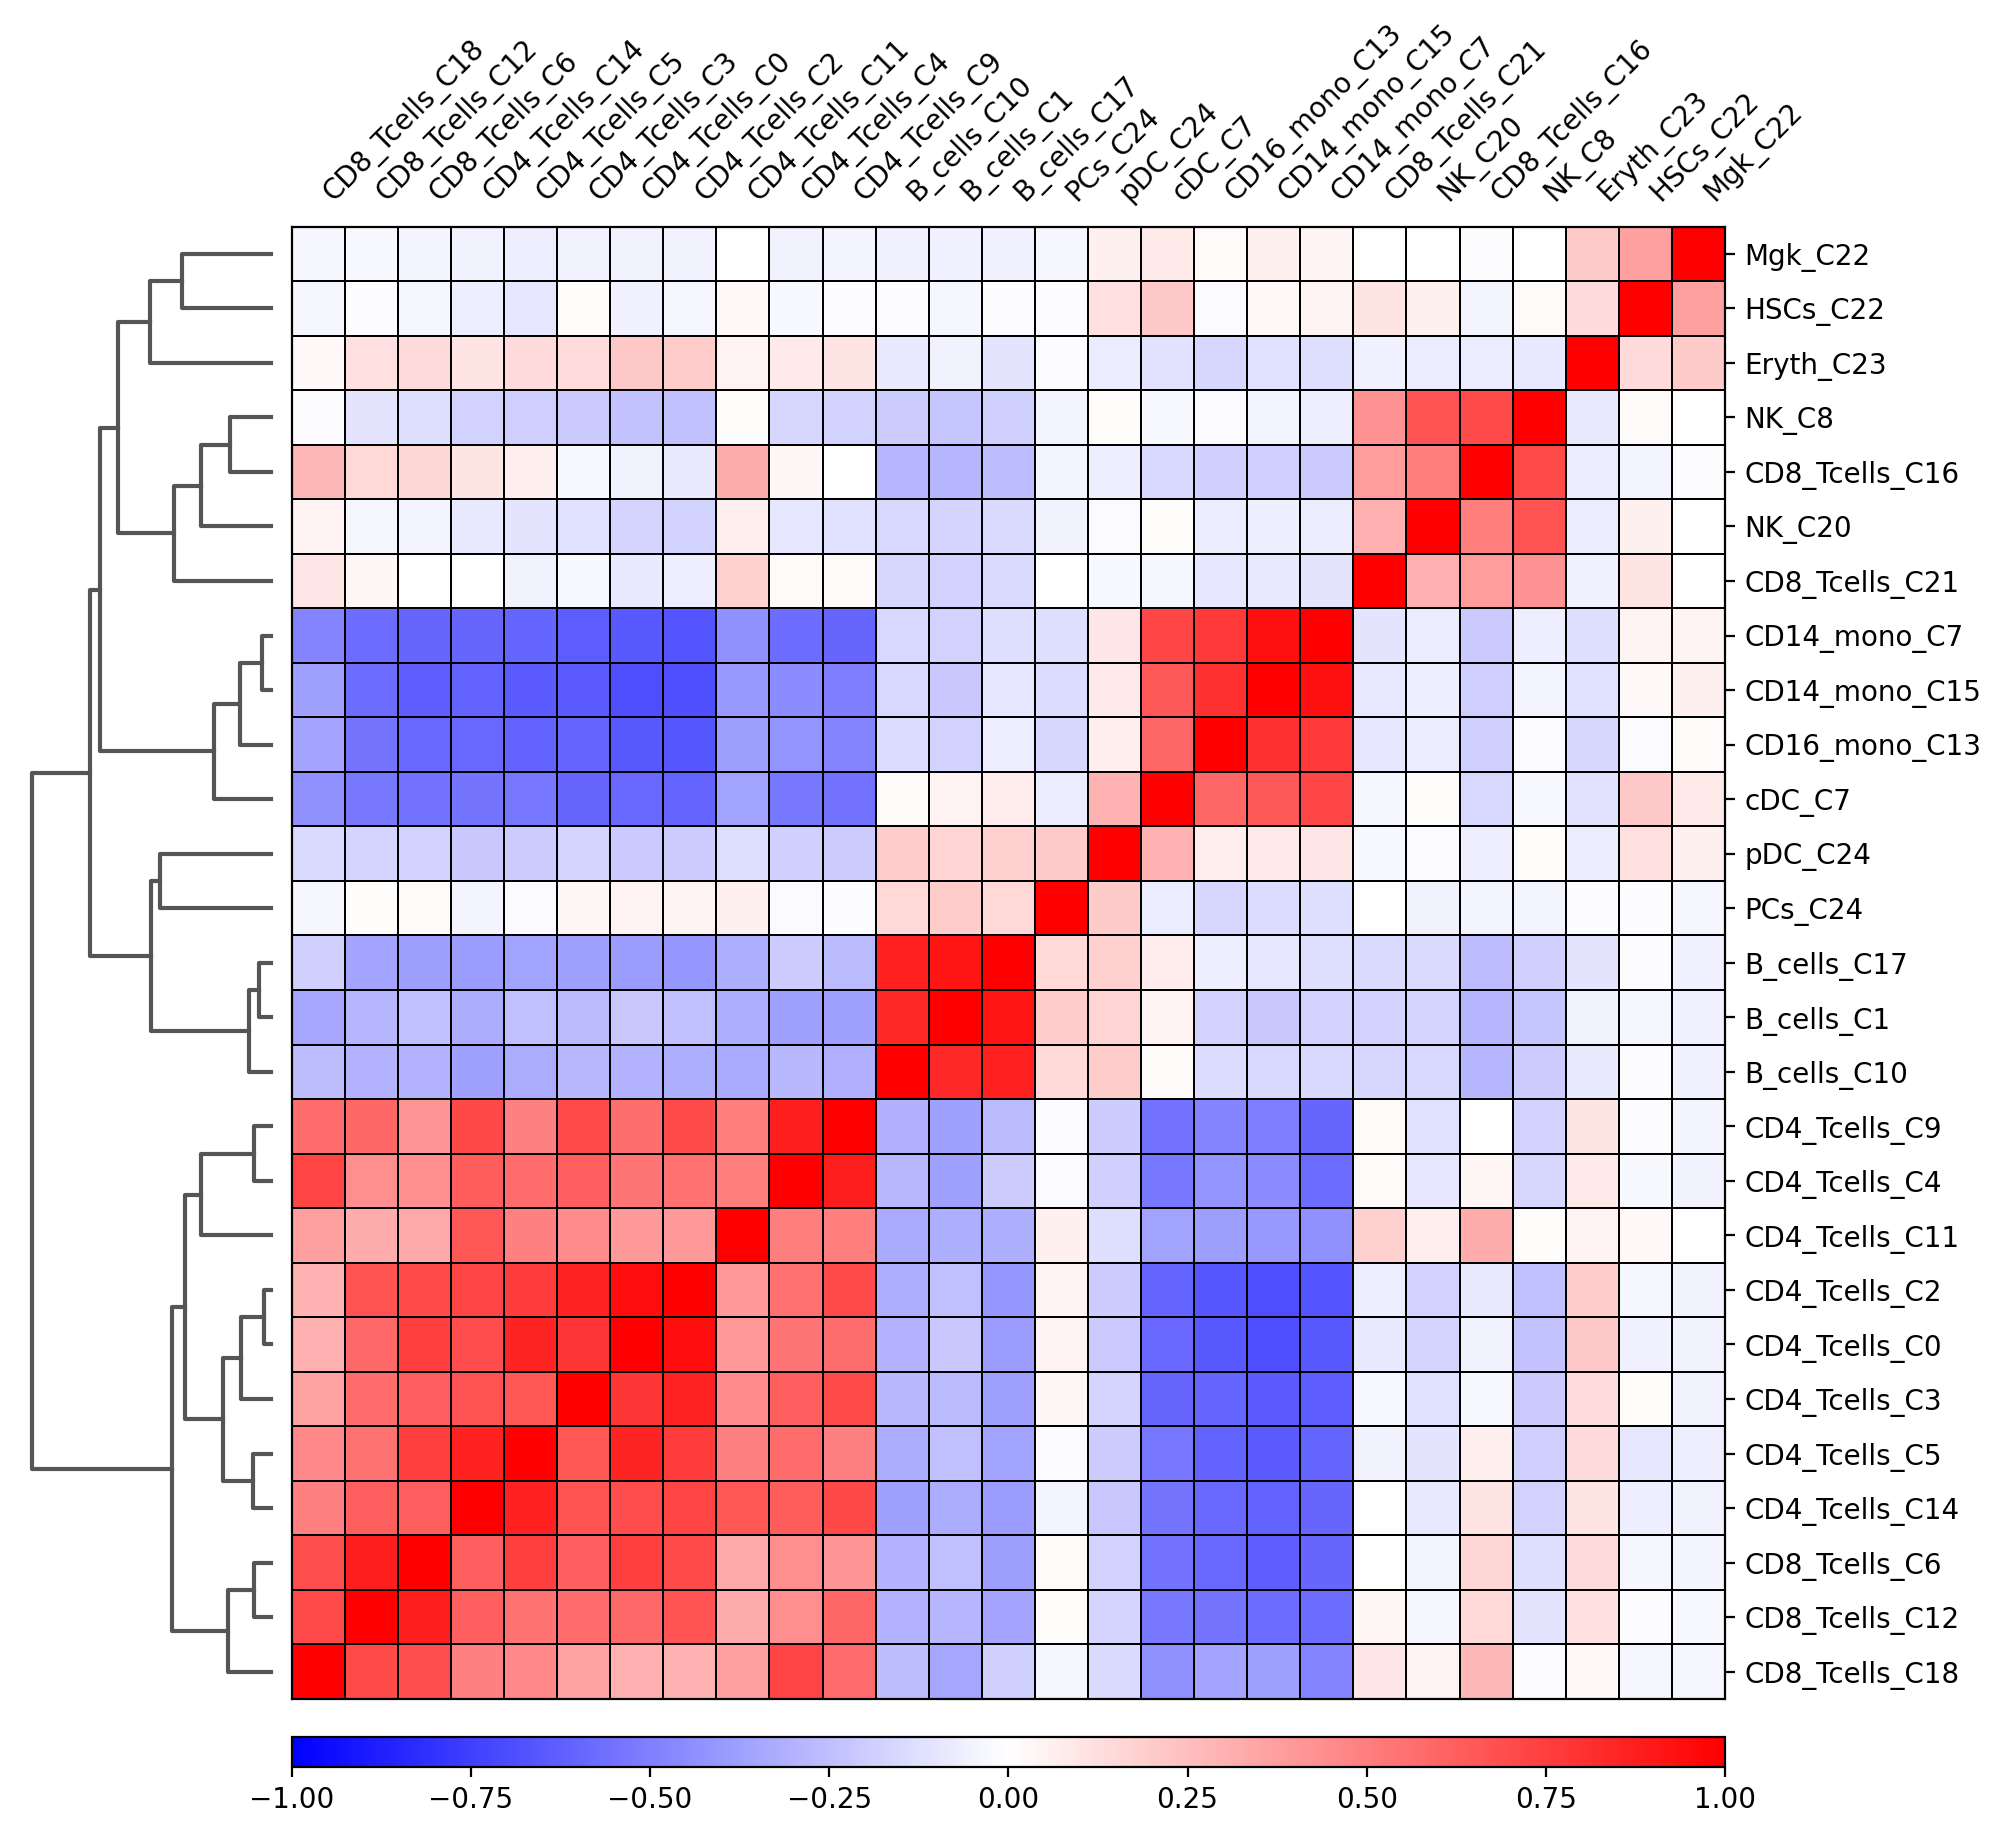

In [14]:
ax = sc.pl.correlation_matrix(pbmc, "clusters_supp", figsize=(11, 10))
                             #save= 'pCoV_Dendro_clusters_06062024.pdf')

## Last check --> 08/26/2024